# Clustering Project

## 1. Data Prep

In [2]:
# a. Read in the data file wholesale_clients.csv
import pandas as pd
data = pd.read_csv('../Data/wholesale_clients.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
# b. Remove the Channel (restaurant, hotel, etc.) and Region columns since they are not fields we want to model on
new_data=data.drop(columns=['Channel','Region'],axis=1)
new_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [7]:
# c. Note the number of rows and columns
new_data.shape

(440, 6)

In [11]:
# d. Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized=scaler.fit_transform(new_data)

std_data=pd.DataFrame(standardized, columns=new_data.columns)
std_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [14]:
# e. Double check that all the column means are 0 and standard deviations are 1
std_data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


## 2. K-Means Clustering

In [18]:
# a. Import KMeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans
for k in range(2,16):
    kmeansK = KMeans(n_clusters = k, n_init = 'auto', random_state = 42)
    kmeansK.fit(std_data)

In [33]:
# b. Create an inertia plot
import matplotlib.pyplot as plt
import seaborn as sns
#in list structure
inertia_values=[]
for k in range(2,16):
    kmeansK = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    kmeansK.fit(std_data)
    inertia_values.append(kmeansK.inertia_) 

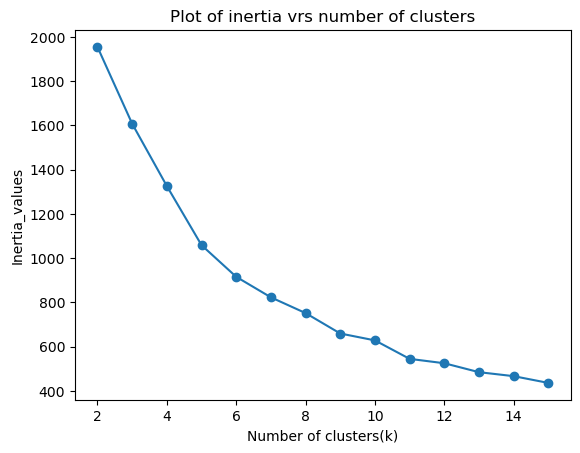

In [34]:
#scatter plot of the inertia values vrs the number of clusters
inertia_series=pd.Series(inertia_values, index=range(2,16))
inertia_series.plot(marker='o')
plt.xlabel("Number of clusters(k)")
plt.ylabel("Inertia_values")
plt.title("Plot of inertia vrs number of clusters")
plt.show()

In [40]:
# c. Identify the elbow of the plot and fit a KMeans model just for that number of clusters
#n_cluster=5
kmeans5 = KMeans(n_clusters = 5, n_init = 'auto', random_state = 42)
kmeans5.fit(std_data)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [41]:
kmeans5.labels_

array([2, 0, 0, 2, 4, 2, 2, 2, 2, 0, 0, 2, 4, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       4, 1, 0, 2, 2, 2, 0, 4, 2, 2, 2, 4, 2, 0, 4, 0, 0, 4, 4, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 4, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 0, 2, 2, 4, 4, 2, 4, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 4,
       2, 4, 2, 2, 1, 4, 0, 2, 2, 2, 2, 2, 0, 0, 2, 4, 2, 2, 0, 0, 2, 0,
       2, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 0, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       4, 2, 2, 2, 2, 4, 0, 3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 4, 4, 0,
       2, 2, 0, 0, 4, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 4, 0, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

In [42]:
# d. Find the number of clients in each cluster
from collections import Counter
Counter(kmeans5.labels_)

Counter({2: 269, 0: 96, 4: 63, 1: 11, 3: 1})

In [38]:
# e. Create a heat map of the cluster centers
kmeans5.cluster_centers_
kmeans5_clusters=pd.DataFrame( kmeans5.cluster_centers_, columns=new_data.columns)
kmeans5_clusters


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.658970,-0.108372,-0.217703,1.103473,-0.404602,0.333025
1,-0.494432,0.687785,0.911873,-0.331564,0.907389,0.102423
2,1.966817,5.175503,1.287217,6.900600,-0.554862,16.478447
3,-0.230203,-0.383683,-0.436548,-0.165013,-0.397208,-0.193797
4,0.313830,3.921906,4.275610,-0.003574,4.618166,0.503365


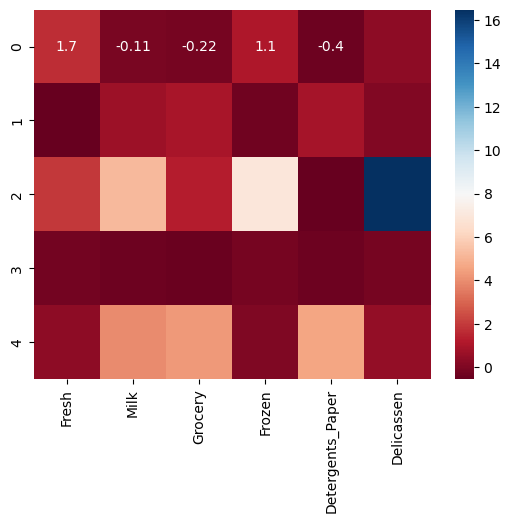

In [39]:
sns.heatmap(kmeans5_clusters,cmap='RdBu', annot=True);

In [11]:
# f. Name the clusters
#cluster 0:all low
#cluster 1:
#cluster 2:
#cluster 3: high delicassen
#cluster 4:

In [53]:
# g. Extra credit: create a silhouette scores plot instead of an inertia plot
from sklearn.metrics import silhouette_score

# create an empty list to hold many silhouette score values
silhouette_scores = []

# create 2 - 15 clusters, and add the silhouette scores to the list
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=100)
    kmeans.fit(std_data)
    silhouette_scores.append(silhouette_score(std_data, kmeans.labels_, metric='euclidean', sample_size=None))
  

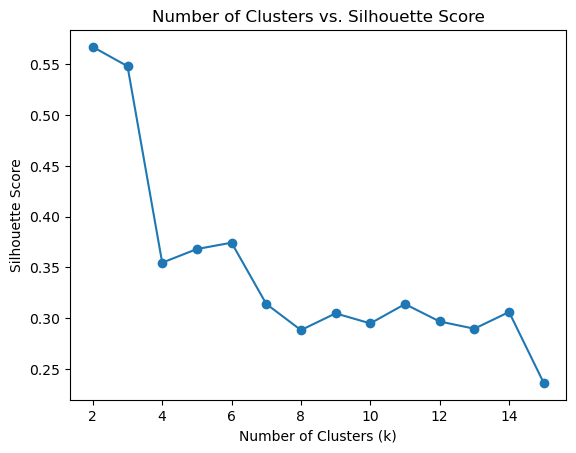

In [54]:
# h. Extra credit: fit two models with the number of clusters for the two highest silhouette scores and name the clusters
 #turn the list into a series for plotting
silhouette_series = pd.Series(silhouette_scores, index=range(2, 16))
# plot the data
silhouette_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

### n_cluster = 2 and 3 are with the best silhoute scores

In [56]:
kmeans2 = KMeans(n_clusters = 2, n_init = 'auto', random_state = 42)
kmeans2.fit(std_data)

KMeans(n_clusters=2, n_init='auto', random_state=42)

In [57]:
kmeans3 = KMeans(n_clusters = 3, n_init = 'auto', random_state = 42)
kmeans3.fit(std_data)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [59]:
kmeans2.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
Counter(kmeans2.labels_)

Counter({0: 437, 1: 3})

In [65]:
kmeans3.labels_

array([2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,

In [62]:
Counter(kmeans3.labels_)

Counter({2: 318, 0: 109, 1: 13})

In [63]:
kmeans2.cluster_centers_
kmeans2_clusters=pd.DataFrame( kmeans2.cluster_centers_, columns=std_data.columns)
kmeans2_clusters


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.008129,-0.014414,-0.002894,-0.058137,0.003393,-0.041979
1,1.184129,2.099624,0.421538,8.468571,-0.494319,6.114925


In [66]:
kmeans3.cluster_centers_
kmeans3_clusters=pd.DataFrame( kmeans3.cluster_centers_, columns=std_data.columns)
kmeans3_clusters

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.503804,0.574921,0.823225,-0.332913,0.816078,0.075524
1,1.090044,3.983203,3.584579,0.777993,3.566641,2.256182
2,0.128126,-0.359900,-0.428714,0.082307,-0.425531,-0.118121


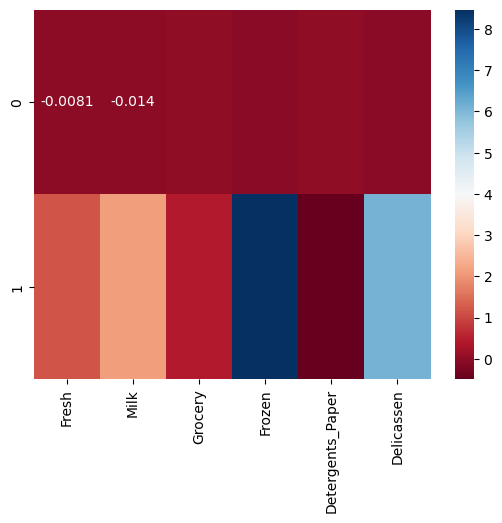

In [68]:
sns.heatmap(kmeans2_clusters,cmap='RdBu',annot=True);

#### cluster 0: clients with low demand of all categories
#### cluster 1: clients with high demand of frozen and delicassen, with average of milk

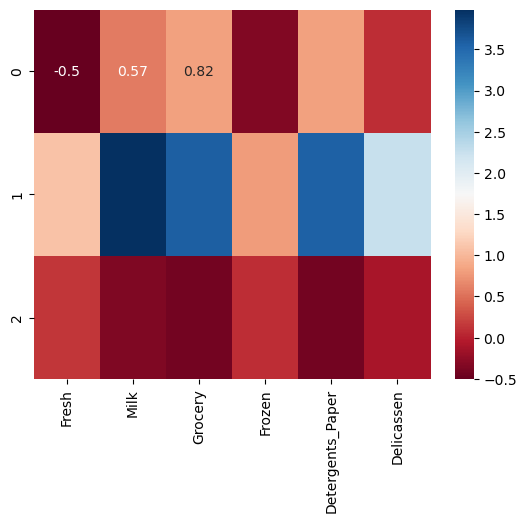

In [69]:
sns.heatmap(kmeans3_clusters,cmap='RdBu',annot=True);

#### cluster 0: clients with average demand of grocery,detergent paper and milk
#### cluster 1: clients with high demand of milk,grocery, detergent paper, with average of others
#### cluster 2: clients with low demand of all categories

## 3. Hierarchical Clustering

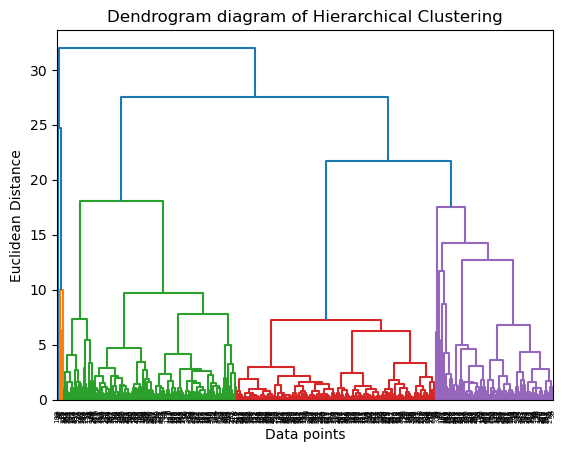

In [71]:
# a. Create a dendrogram using the scaled data
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix= linkage(std_data, method='ward',metric='euclidean')
Dendrogram = dendrogram(linkage_matrix, color_threshold=20)
plt.xlabel("Data points")
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram diagram of Hierarchical Clustering");

In [15]:
# b. Visually identify the number of clusters and update the color threadshold, if necessary
# 4 clusters

In [105]:
# c. Fit an agglomerative clustering model on the scaled data set with the "best" clusters and view the number of data points in each cluster
from sklearn.cluster import AgglomerativeClustering
agg= AgglomerativeClustering(4)
agg.fit(std_data)

AgglomerativeClustering(n_clusters=4)

In [106]:
agg.labels_

array([2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 3, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0,

In [107]:
Counter(agg.labels_)

Counter({0: 281, 2: 153, 1: 5, 3: 1})

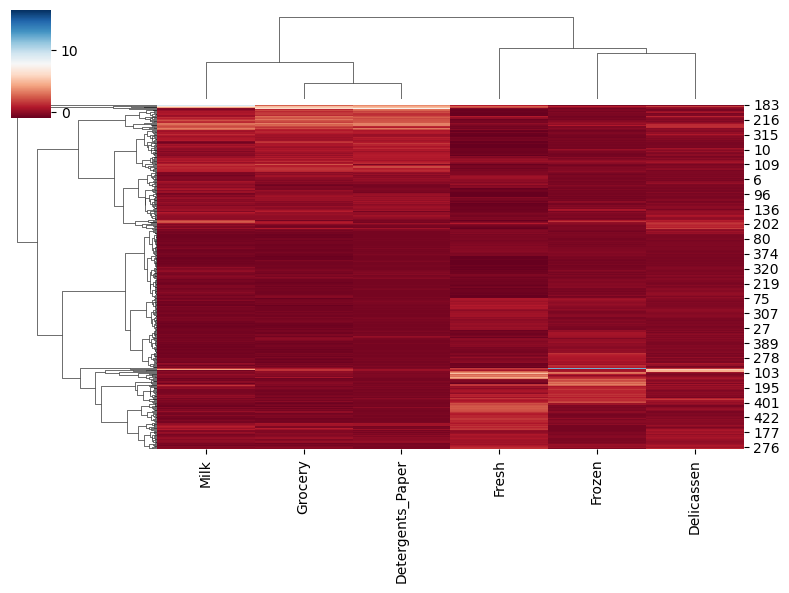

In [75]:
# d. Create a cluster map of the model you just fit
sns.clustermap(std_data,method='ward',cmap='RdBu',figsize=(8,6), xticklabels=std_data.columns)
plt.show()

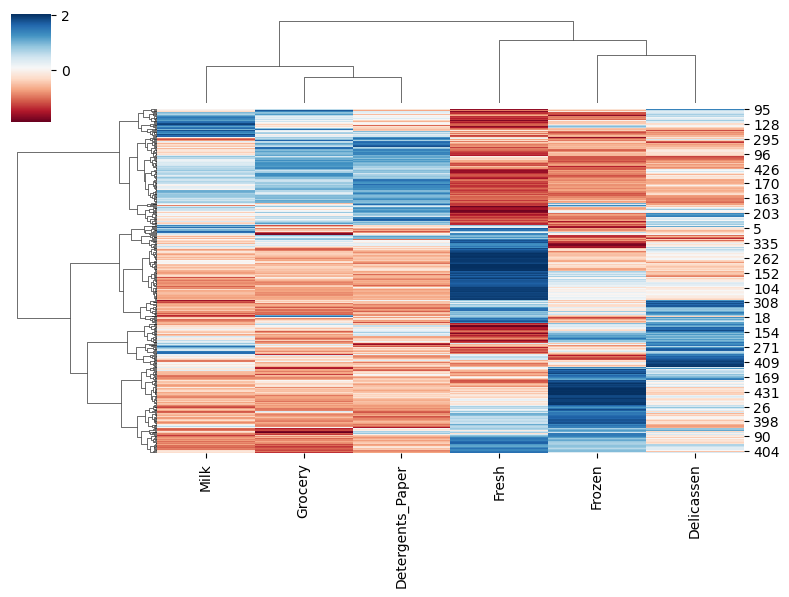

In [76]:
# e. Extra credit: within the clustermap function, add z_score=0 (scales data by row), see what happens and interpret the clusters
sns.clustermap(std_data,method='ward',cmap='RdBu',figsize=(8,6), xticklabels=std_data.columns,z_score=0)
plt.show()

In [79]:
# f. Extra credit: write a loop to view the silhouette score for 2 to 20 clusters
from sklearn.metrics import silhouette_score

agg_silhouette_scores = {}

for n in range(2, 21):
    agg_n = AgglomerativeClustering(n)
    agg_n.fit(std_data)
    agg_ss = silhouette_score(std_data, agg_n.labels_, metric='euclidean', sample_size=None)
    agg_silhouette_scores[n] = agg_ss

agg_silhouette_scores

{2: 0.7924572758342273,
 3: 0.2646091480214908,
 4: 0.2670148241989557,
 5: 0.23988371669170097,
 6: 0.23424990872738188,
 7: 0.24405686464597856,
 8: 0.2520384687343341,
 9: 0.27202620570114383,
 10: 0.27954261064916225,
 11: 0.28015398902140587,
 12: 0.24562381160303043,
 13: 0.24647695283235932,
 14: 0.22903049767293357,
 15: 0.2308407937114372,
 16: 0.18896719179943278,
 17: 0.1959949281863608,
 18: 0.1954950889983609,
 19: 0.20219343087967662,
 20: 0.20160566549699505}

In [81]:
# g. Extra credit: fit a model with the number of clusters for the highest silhouette score
agg2= AgglomerativeClustering(2)
agg2.fit(std_data)

AgglomerativeClustering()

In [82]:
Counter(agg2.labels_)

Counter({0: 434, 1: 6})

## 4. DBSCAN

In [86]:
# a. Copy over the tune_dbscan function from the demo code
from sklearn.cluster import DBSCAN

# Using a function
import numpy as np
# loop through many values of epsilon and min_samples
def tune_dbscan(data):

    results = []
    
    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 2, .1)
    min_samples_values = np.arange(2, 10, 1)
    
    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_
            
            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            
            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)
            
            # calculate the silhouette score
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None
            
            results.append([eps, min_samples, n_clusters, n_noise, silhouette])
    
    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [88]:
# b. Apply the dbscan function on the scaled data
result=tune_dbscan(std_data)
result

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,8,423,-0.393
1,0.1,3,1,437,NaN
2,0.1,4,0,440,NaN
3,0.1,5,0,440,NaN
4,0.1,6,0,440,NaN
...,...,...,...,...,...
147,1.9,5,1,15,NaN
148,1.9,6,1,18,NaN
149,1.9,7,1,18,NaN
150,1.9,8,1,19,NaN


In [89]:
# c. Sort the data by highest silhouette score
# view only the top result for each silhouette score
(result.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
136,1.8,2,2,13,0.581583
122,1.6,4,2,24,0.578543
97,1.3,3,3,25,0.424572
105,1.4,3,3,23,0.423547
113,1.5,3,3,21,0.421271


In [90]:
# d. Notice that the top eps value is close to 2, so update the function to test eps values up to 5 (instead of 2)
def tune_dbscan(data):

    results = []
    
    # define a range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 5, .1)
    min_samples_values = np.arange(2, 10, 1)
    
    # loop through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_
            
            # count the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            
            # count the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)
            
            # calculate the silhouette score
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None
            
            results.append([eps, min_samples, n_clusters, n_noise, silhouette])
    
    # put the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [91]:
# e. Try applying the function again and view the top silhouette scores
result2=tune_dbscan(std_data)
result2

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,8,423,-0.393
1,0.1,3,1,437,NaN
2,0.1,4,0,440,NaN
3,0.1,5,0,440,NaN
4,0.1,6,0,440,NaN
...,...,...,...,...,...
387,4.9,5,1,5,NaN
388,4.9,6,1,5,NaN
389,4.9,7,1,5,NaN
390,4.9,8,1,6,NaN


In [92]:
# view only the top result for each silhouette score
(result2.sort_values('Silhouette Score', ascending=False)
               .groupby('Silhouette Score')
               .head(1)).head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
272,3.5,2,2,8,0.740284
224,2.9,2,2,10,0.582247
136,1.8,2,2,13,0.581583
122,1.6,4,2,24,0.578543
232,3.0,2,3,8,0.577890


In [95]:
# f. Fit a DBSCAN model on the scaled data set with the best eps + min_samples values and view the number of data points in each cluster
dbscan_2 = DBSCAN(eps=3.5, min_samples=2)
dbscan_2.fit(std_data)
dbscan_2.labels_
            

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [96]:
Counter(dbscan_2.labels_)

Counter({0: 430, -1: 8, 1: 2})

## 5. Compare Techniques

For each of the following 5 models, fit the model on the scaled data, note down the number of data points in each cluster and record the silhouette score:
1. K-Means with 3 clusters
2. K-Means with 5 clusters
3. Hiearchical Clustering with 2 clusters
4. Hierarchical Clustering with 5 clusters
5. DBSCAN with 2 clusters

In [98]:
def print_metrics(model, data):
    print(model)
    print(Counter(model.labels_))
    print(silhouette_score(data, model.labels_))

In [99]:
print_metrics(kmeans3, std_data)

KMeans(n_clusters=3, n_init='auto', random_state=42)
Counter({2: 318, 0: 109, 1: 13})
0.33391714199926514


In [100]:
print_metrics(kmeans5, std_data)

KMeans(n_clusters=5, n_init='auto', random_state=42)
Counter({2: 269, 0: 96, 4: 63, 1: 11, 3: 1})
0.3663027726916198


In [109]:
print_metrics(agg2, std_data) #cluster 2

AgglomerativeClustering()
Counter({0: 434, 1: 6})
0.7924572758342273


In [110]:
print_metrics(agg, std_data) #cluster 4

AgglomerativeClustering(n_clusters=4)
Counter({0: 281, 2: 153, 1: 5, 3: 1})
0.2670148241989557


In [111]:
print_metrics(dbscan_2, std_data)

DBSCAN(eps=3.5, min_samples=2)
Counter({0: 430, -1: 8, 1: 2})
0.740283564230615


## 6. Recommend Client Segments

In [112]:
# a. With the top model as the K-Means model with 3 clusters, review the results again
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans3.fit(std_data)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [113]:
Counter(kmeans3.labels_)

Counter({2: 318, 0: 109, 1: 13})

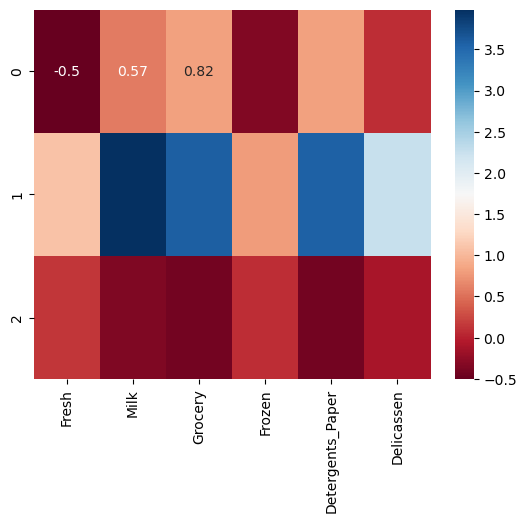

In [119]:
# view the cluster centers
cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=std_data.columns)
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

### Name the clusters:

* Cluster 2: **Typical Clients**
* Cluster 0: **lesser Fresh and Frozen Items**
* Cluster 1: **More Milk, Grocery,delicassen and Paper Items**

In [28]:
# b. Clearly state what you would recommend as client segments and how you would better support those clients


## 7. Predict the Cluster of a New Client

In [116]:
# a. Given this new client, determine which cluster they fall into
import pandas as pd
import numpy as np

new_client = pd.DataFrame([np.array([15000, 15000, 30000, 500, 15000, 2000])],
                          columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
new_client

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,15000,15000,30000,500,15000,2000


In [117]:
# b. Scale the new client data using the same scaler object from the Data Prep step
new_client_scaled = pd.DataFrame(scaler.transform(new_client), columns=new_data.columns)
new_client_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.237451,1.248474,2.322787,-0.530388,2.544604,0.168671


In [118]:
# c. Make a prediction using the K-Means model with 3 clusters
kmeans3.predict(new_client_scaled)

array([0])

In [32]:
# d. Which cluster does the new client belong to?
#cluster 0: